In [1]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

import dataframe_image as dfi
from pprint import pprint

In [2]:
# read cleand oscar omdb data
oscar_df = pd.DataFrame( pd.read_csv("../project1-team8/Resources/oscar_omdb_clean.csv" ) )
oscar_df.head()

,Oscar_Film,Oscar_Year,Oscar_Award,Oscar_Nomination,Year,Rated,Runtime,Genre,Director,Writer,...,Plot,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Ratings_IMD,Ratings_Rotten_Tomatoes,Ratings_Metacritic
0,Everything Everywhere All at Once,2022,7,11,2022.0,R,139.0,"Action, Adventure, Comedy","Daniel Kwan, Daniel Scheinert","Daniel Kwan, Daniel Scheinert",...,A middle-aged Chinese immigrant is swept up in...,"English, Mandarin, Cantonese",United States,Won 7 Oscars. 372 wins & 357 nominations total,7.8,445131.0,77191785.0,7.8,9.3,8.1
1,All Quiet on the Western Front,2022,4,9,2022.0,R,148.0,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell",...,A young German soldier's terrifying experience...,"German, French","Germany, United States, United Kingdom",Won 4 Oscars. 48 wins & 81 nominations total,7.8,205354.0,NaN,7.8,9.0,7.6
2,The Whale,2022,2,3,2022.0,R,117.0,Drama,Darren Aronofsky,Samuel D. Hunter,...,"A reclusive, morbidly obese English teacher at...",English,United States,Won 2 Oscars. 43 wins & 116 nominations total,7.7,139972.0,17463630.0,7.7,6.4,6.0
3,Top Gun: Maverick,2022,1,6,2022.0,PG-13,130.0,"Action, Drama",Joseph Kosinski,"Jim Cash, Jack Epps Jr., Peter Craig",...,"After thirty years, Maverick is still pushing ...",English,United States,Won 1 Oscar. 93 wins & 214 nominations total,8.3,590794.0,718732821.0,8.3,9.6,7.8
4,Black Panther: Wakanda Forever,2022,1,5,2022.0,PG-13,161.0,"Action, Adventure, Drama",Ryan Coogler,"Ryan Coogler, Joe Robert Cole, Stan Lee",...,The people of Wakanda fight to protect their h...,"English, Xhosa, Maya, Spanish, Haitian, French",United States,Won 1 Oscar. 44 wins & 154 nominations total,6.7,270203.0,453829060.0,6.7,8.4,6.7


In [3]:
# select year and boxoffice
year_box_df = oscar_df[['Year', 'Oscar_Film' ,'BoxOffice']]
year_box_df = year_box_df.dropna()
year_box_df['Year'] = year_box_df['Year'].astype(int)

### Original BoxOffice

As a matter of common sense, the dollar and its purchasing capacity is decreasing due to accumulated inflation rate. The box plot on box office shows older movies have much lower box office compared to new movies. If we try to evaluate the popularity or best seller of a movie at its time, original box office value is not ideal.

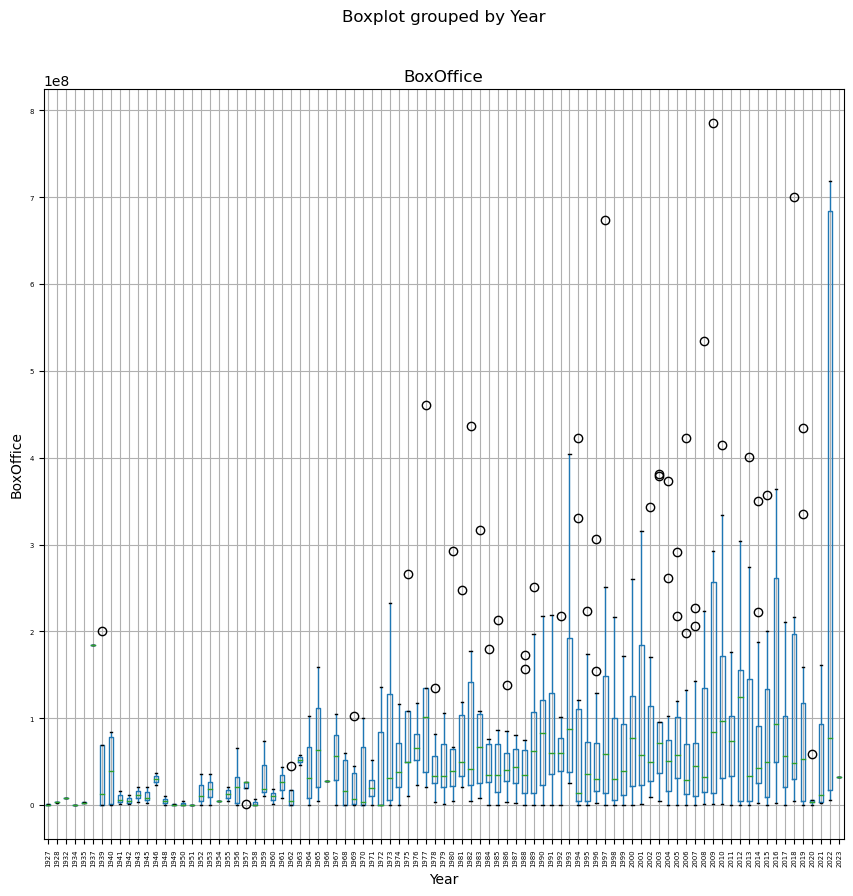

In [4]:
plot = year_box_df[['Year','BoxOffice']].boxplot(by='Year', rot=90 , fontsize=5, xlabel = "Year", ylabel ="BoxOffice", \
                                                figsize=(10,10))
plot.figure.savefig('./output/origin_year_boxoffic_boxplot.png')

### Commodity boxoffice

Therefore, introducing commodities as evaluators is an approach. 2 commodities are choices at this time, wheat and gold.

Wheat has had a stable price in the last 63 years, the yearly average price has min at $1.33/bushel, max at $9.53/bushel.
Gold has had a steep price in the last 54 years, the yearly average price has min at $35.96/ounce, max at $1864.11/ounce.

The boxoffice is transferred to commodities quantities at its time then converted to the value those commodities worth in 2022. To balance the value, we decided to set commodity boxoffice  = 80% wheat value + 20% gold value.

In [5]:
# read wheat price
wheat_df = pd.DataFrame( pd.read_csv("../project1-team8/Resources/boxoffice/year_wheat.csv" ) )
wheat_df.head()

,year,avg_closing_price,year_open,year_high,year_low,year_close,annual_perc_change
0,2022,$9.5324,$7.5800,$12.9400,$7.4150,$8.7129,13.04%
1,2021,$7.0402,$6.4200,$8.5600,$6.0175,$7.7075,20.34%
2,2020,$5.4980,$5.6025,$6.4075,$4.7470,$6.4050,14.63%
3,2019,$4.9414,$5.0675,$5.5875,$4.2475,$5.5875,11.03%
4,2018,$4.9757,$4.3350,$5.7450,$4.1650,$5.0325,17.86%


In [6]:
# clean wheat price data
wheat_df = wheat_df[['year' , 'avg_closing_price']]
wheat_df.columns = ['Year' , 'wheat_dollar_bushel']

wheat_df['wheat_dollar_bushel'] = [ re.sub( "[^0-9\.]","" , str(dollar) ) for dollar in wheat_df[ 'wheat_dollar_bushel' ] ]
wheat_df['wheat_dollar_bushel'] = pd.to_numeric(wheat_df['wheat_dollar_bushel'], errors='coerce')

In [7]:
wheat_df[['Year','wheat_dollar_bushel']].describe()

,Year,wheat_dollar_bushel
count,63.000000,63.000000
mean,1991.000000,3.808776
std,18.330303,1.766088
min,1960.000000,1.328600
25%,1975.500000,2.681600
50%,1991.000000,3.508600
75%,2006.500000,4.641250
max,2022.000000,9.532400


In [8]:
png_df = wheat_df[['Year','wheat_dollar_bushel']].describe()
dfi.export(png_df, './output/wheat_price.png')

In [9]:
# read gold price
gold_df = pd.DataFrame( pd.read_csv("../project1-team8/Resources/boxoffice/year_gold.csv" ) )
gold_df.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Range Price,Year Close,Annual % Change
0,1969,41.10,41.80,43.75,35.00,8.75,35.21,-0.161
1,1970,35.96,35.13,39.19,34.78,4.41,37.38,0.062
2,1971,40.80,37.33,43.90,37.33,6.57,43.50,0.164
3,1972,58.17,43.73,70.00,43.73,26.27,64.70,0.487
4,1973,97.12,64.99,127.00,64.10,62.90,112.25,0.735


In [10]:
gold_df = gold_df[ ['Year', 'Average Closing Price'] ]
gold_df.columns = ['Year','gold_dollar_ounce']

In [11]:
gold_df[['Year','gold_dollar_ounce']].describe()

,Year,gold_dollar_ounce
count,54.000000,54.000000
mean,1995.500000,614.832407
std,15.732133,522.134252
min,1969.000000,35.960000
25%,1982.250000,297.342500
50%,1995.500000,383.900000
75%,2008.750000,948.337500
max,2022.000000,1864.110000


In [12]:
png_df = gold_df[['Year','gold_dollar_ounce']].describe()
dfi.export(png_df, './output/gold_price.png')

In [13]:
# mearge move boxoffice with commodity prices

year_box_df = pd.merge( year_box_df , wheat_df , how="inner" )
year_box_df = pd.merge( year_box_df , gold_df , how="inner" )

print(year_box_df.shape)
year_box_df.head()

(569, 5)


,Year,Oscar_Film,BoxOffice,wheat_dollar_bushel,gold_dollar_ounce
0,2022,Everything Everywhere All at Once,77191785.0,9.5324,1864.11
1,2022,The Whale,17463630.0,9.5324,1864.11
2,2022,Top Gun: Maverick,718732821.0,9.5324,1864.11
3,2022,Black Panther: Wakanda Forever,453829060.0,9.5324,1864.11
4,2022,Avatar: The Way of Water,684075767.0,9.5324,1864.11


In [14]:
# drop scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2022's wheat price and gold price

wheat_now = float( wheat_df.loc[ wheat_df['Year'] == 2022 , 'wheat_dollar_bushel'] )
gold_now = float( gold_df.loc[ gold_df['Year'] == 2022 , 'gold_dollar_ounce'] )

# convert boxoffice to bushel of wheat, and evaluate the wheat value in today
year_box_df['boxoffice_wheat_bushel'] = year_box_df['BoxOffice'] / year_box_df['wheat_dollar_bushel']
year_box_df['boxoffice_wheat_dollar'] = year_box_df['boxoffice_wheat_bushel'] * wheat_now

# convert boxoffice to bushel of wheat, and evaluate the wheat value in today
year_box_df['boxoffice_gold_ounce'] = year_box_df['BoxOffice'] / year_box_df['gold_dollar_ounce']
year_box_df['boxoffice_gold_dollar'] = year_box_df['boxoffice_gold_ounce'] * gold_now

# average of wheat and gold boxoffice = commodity dollar
year_box_df['commodity_dollar'] = ( year_box_df['boxoffice_wheat_dollar'] * 0.8 + year_box_df['boxoffice_gold_dollar'] * 0.2 )

# convert dollar to million

million = 10**6

year_box_df['BoxOffice_Million' ] = year_box_df['BoxOffice'] / million
year_box_df['Wheat_Million'] = year_box_df['boxoffice_wheat_dollar'] / million
year_box_df['Gold_Million'] = year_box_df['boxoffice_gold_dollar'] / million
year_box_df['Commodity_Million'] = year_box_df['commodity_dollar'] / million

In [15]:
# boxoffice and Award for movies
boxoffice_m_df = year_box_df[['Year', 'Oscar_Film','BoxOffice_Million', 'Wheat_Million' ,'Gold_Million','Commodity_Million']]
boxoffice_m_df = pd.merge( boxoffice_m_df, oscar_df[['Oscar_Film', 'Oscar_Award', 'Oscar_Nomination','Genre']], how="left")
boxoffice_m_df

,Year,Oscar_Film,BoxOffice_Million,Wheat_Million,Gold_Million,Commodity_Million,Oscar_Award,Oscar_Nomination,Genre
0,2022,Everything Everywhere All at Once,77.19,77.19,77.19,77.19,7,11,"Action, Adventure, Comedy"
1,2022,The Whale,17.46,17.46,17.46,17.46,2,3,Drama
2,2022,Top Gun: Maverick,718.73,718.73,718.73,718.73,1,6,"Action, Drama"
3,2022,Black Panther: Wakanda Forever,453.83,453.83,453.83,453.83,1,5,"Action, Adventure, Drama"
4,2022,Avatar: The Way of Water,684.08,684.08,684.08,684.08,1,4,"Action, Adventure, Fantasy"
...,...,...,...,...,...,...,...,...,...
564,1969,Butch Cassidy and the Sundance Kid,102.31,734.04,4640.27,1515.29,4,7,"Biography, Crime, Drama"
565,1969,"Hello, Dolly!",0.40,2.88,18.18,5.94,3,7,"Adventure, Comedy, Musical"
566,1969,Z,0.08,0.60,3.78,1.23,2,5,"Crime, Drama, Thriller"
567,1969,Anne of the Thousand Days,2.07,14.84,93.81,30.63,1,10,"Biography, Drama, History"


In [16]:
# prepare text label for plot
over_m = boxoffice_m_df[ boxoffice_m_df['Commodity_Million'] > 500 ]
over_m = over_m.sort_values( 'Year' ,ascending=False).reset_index(drop=True)

over_m['xaxis']  = over_m['Year']
over_m['yaxis']  = over_m['Commodity_Million']

# shift (x,y) location for text to avoid overlap
for i in range(len(over_m)-1) :
    if ( abs(over_m.iloc[i]['yaxis'] - over_m.iloc[i+1]['yaxis']) <= 20) & \
    ( over_m.iloc[i]['xaxis'] - over_m.iloc[i+1]['xaxis'] <= 3 ) :
        over_m.loc[i+1,'yaxis'] = over_m.iloc[i]['yaxis'] - 20
        over_m.loc[i,'xaxis'] = over_m.iloc[i]['xaxis'] - 2
        over_m.loc[i+1,'xaxis'] = over_m.iloc[i]['xaxis'] + 2

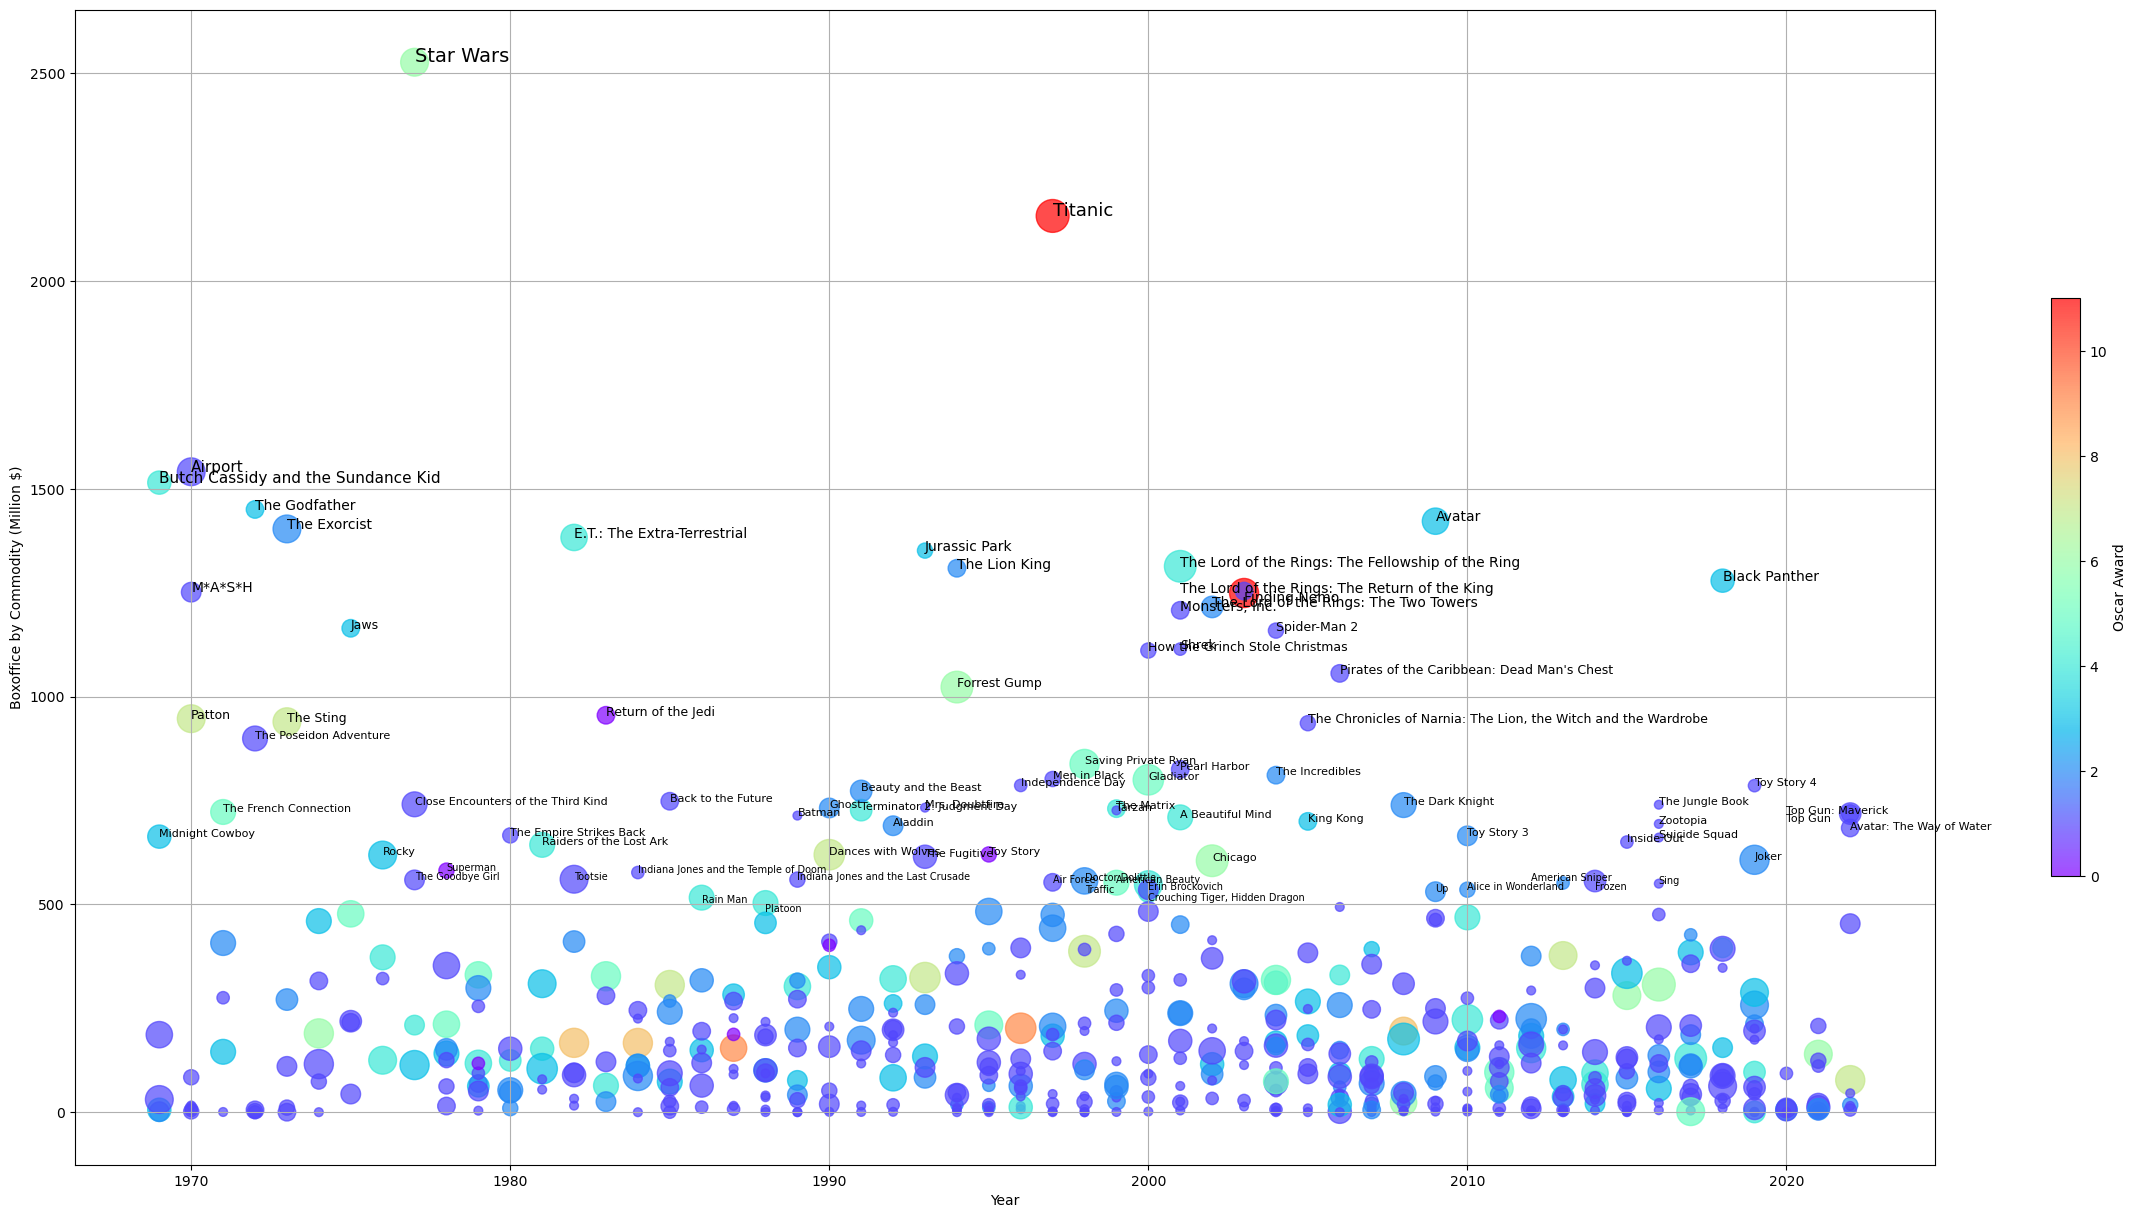

In [17]:
plt.figure(figsize=(30,15))

plt.grid()

plt.scatter(boxoffice_m_df['Year'],  boxoffice_m_df['Commodity_Million'], \
            alpha = 0.7 , \
            s = boxoffice_m_df['Oscar_Nomination']*40, c=boxoffice_m_df['Oscar_Award'] ,cmap="rainbow" )
plt.xlabel("Year")
plt.ylabel("Boxoffice by Commodity (Million $)")
plt.colorbar(label="Oscar Award", location='right' , shrink=0.5 )

# add movie name for over 500 million
for i in range(len(over_m)) :
    plt.text( over_m.iloc[ i ]['xaxis'] , over_m.iloc[ i ]['yaxis'] , over_m.iloc[ i ]['Oscar_Film'], \
             size = math.floor(over_m.iloc[ i ]['Commodity_Million']/300)+6, rotation=0 )

plt.savefig('./output/Commodity_Million_boxoffic.png')

### Commodity boxoffice and Oscar Award

By commodity boxoffice, we could find which movies were historically best sellers at its time. Oscar is an academic award, the preference is more artistic rather than commercial, therefore almost all movies on this list are commercial movies and some Oscar Award movies don't show better market performance compared to others.

The top 25 boxoffice movies in Oscar history.

In [18]:
# best sellers in all oscar award
best_movies = boxoffice_m_df[['Year','Oscar_Film','Commodity_Million','BoxOffice_Million']]
best_movies = best_movies.sort_values( 'Commodity_Million' , ascending=False).reset_index(drop=True)
best_movies = pd.merge( best_movies, oscar_df[['Oscar_Film', 'Oscar_Award', 'Oscar_Nomination','Genre']], how="left")

dfi.export(best_movies[ 0:25 ], './output/best_seller_oscar.png')

best_movies[ 0:25 ]

,Year,Oscar_Film,Commodity_Million,BoxOffice_Million,Oscar_Award,Oscar_Nomination,Genre
0,1977,Star Wars,2527.01,461.00,6,10,"Action, Adventure, Fantasy"
1,1997,Titanic,2157.07,674.29,11,14,"Drama, Romance"
2,1970,Airport,1541.37,100.49,1,10,"Action, Drama, Thriller"
3,1969,Butch Cassidy and the Sundance Kid,1515.29,102.31,4,7,"Biography, Crime, Drama"
4,1972,The Godfather,1450.64,136.38,3,4,"Crime, Drama"
5,2009,Avatar,1422.42,785.22,3,9,"Action, Adventure, Fantasy"
6,1973,The Exorcist,1403.84,233.01,2,10,Horror
7,1982,E.T.: The Extra-Terrestrial,1383.28,437.14,4,9,"Adventure, Family, Sci-Fi"
8,1993,Jurassic Park,1351.66,404.21,3,3,"Action, Adventure, Sci-Fi"
9,2001,The Lord of the Rings: The Fellowship of the Ring,1313.85,316.12,4,13,"Action, Adventure, Drama"


In [19]:
# regression
regression_model = linregress(  boxoffice_m_df['Oscar_Nomination'], boxoffice_m_df['Commodity_Million'] )
regression_model

LinregressResult(slope=29.25275748290426, intercept=107.95975291133382, rvalue=0.29663376949009823, pvalue=5.06789247514218e-13, stderr=3.955069426749606, intercept_stderr=22.228403178066895)

In [ ]:
# regression line
line_eq = "y = " + str(round(regression_model.slope,2)) + "x + " + str(round(regression_model.intercept,2))
regress_values = boxoffice_m_df['Oscar_Nomination'] * regression_model.slope + regression_model.intercept

In [28]:
# text label for plot
award_m = boxoffice_m_df[ boxoffice_m_df['Oscar_Award'] >= 7 ]

The r-squared is: 0.08799159320190474


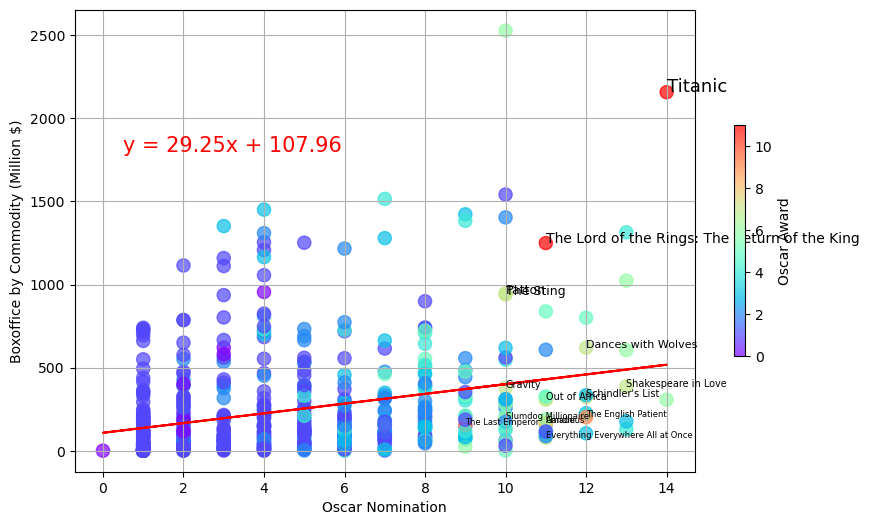

In [29]:
# plot for Oscar_Nomination and Commodity_Million
plt.figure(figsize=(10,6))

plt.grid()

plt.scatter(boxoffice_m_df['Oscar_Nomination'],  boxoffice_m_df['Commodity_Million'], \
            alpha = 0.7 , s= 90, c=boxoffice_m_df['Oscar_Award'] ,cmap="rainbow" )

plt.plot(boxoffice_m_df['Oscar_Nomination'],regress_values,"r-")
plt.annotate(line_eq,(0.5,1800),fontsize=15,color="red")

plt.xlabel("Oscar Nomination")
plt.ylabel("Boxoffice by Commodity (Million $)")

plt.colorbar(label="Oscar Award", location='right' , shrink=0.5 )

# add movie name for over 500 million
for i in range(len(award_m)) :
    plt.text( award_m.iloc[ i ]['Oscar_Nomination'] , award_m.iloc[ i ]['Commodity_Million'] , award_m.iloc[ i ]['Oscar_Film'], \
             size = math.floor(award_m.iloc[ i ]['Commodity_Million']/300)+6, rotation=0 )

print(f"The r-squared is: {regression_model.rvalue**2}")

plt.savefig('./output/regression_boxoffic.png')

### Regression on Nomination and Commdity Boxoffice

Even though the observation shows it’s unlikely the Oscar award and boxoffice are linearly correlated. Visualizing the linear regression on Oscar_Nomination and Commodity_Million boxoffice is still a very interesting idea. This regression line has pvalue close to 0, but Standard error of the estimate on Nomination is 3.9 which is very significant considering the Oscar_Nomination is in (1,14).

Hence, Oscar Nominated movies have a slightly better chance to achieve higher commercial gain, but there is no statistical evidence to prove Nomination and commercial success are correlated.